### Data Understanding

In [17]:
# import all the necessary libraries

# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats

# Display options
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette='muted', font_scale=1.1)

# Jupyter magic for inline plots
%matplotlib inline

import sklearn

In [18]:
# Load the Walmart sales dataset
df = pd.read_csv('data/Walmart_sales_analysis.csv')

# Display the first 5 rows
df.head()

,Store_Number,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2/5/2010,"1,643,691",0,42.31,2.572,211,8.106
1,1,2/12/2010,"1,641,957",1,38.51,2.548,211,8.106
2,1,2/19/2010,"1,611,968",0,39.93,2.514,211,8.106
3,1,2/26/2010,"1,409,728",0,46.63,2.561,211,8.106
4,1,3/5/2010,"1,554,807",0,46.50,2.625,211,8.106


In [19]:
# Summary statistics for numerical columns
df.describe()


,Store_Number,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,0.069930,60.663782,3.358607,171.583994,7.999151
std,12.988182,0.255049,18.444933,0.459020,39.351305,1.875885
min,1.000000,0.000000,-2.060000,2.472000,126.000000,3.879000
25%,12.000000,0.000000,47.460000,2.933000,132.000000,6.891000
50%,23.000000,0.000000,62.670000,3.445000,183.000000,7.874000
75%,34.000000,0.000000,74.940000,3.735000,213.000000,8.622000
max,45.000000,1.000000,100.140000,4.468000,227.000000,14.313000


In [20]:
print("Shape of the dataset:", df.shape)
print("Columns:", df.columns.tolist())

Shape of the dataset: (6435, 8)
Columns: ['Store_Number', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', ' CPI ', 'Unemployment']


In [21]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check data types
print("\nData types:")
print(df.dtypes)

Missing values per column:
Store_Number    0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
 CPI            0
Unemployment    0
dtype: int64

Data types:
Store_Number      int64
Date             object
Weekly_Sales     object
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
 CPI              int64
Unemployment    float64
dtype: object


### Data Preparation

In [22]:
# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Remove commas and Convert 'Weekly_Sales' to numeric (handle any non-numeric issues)
df['Weekly_Sales'] = df['Weekly_Sales'].str.replace(',', '', regex=False)
df['Weekly_Sales'] = pd.to_numeric(df['Weekly_Sales'], errors='coerce')

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


# Check the first few values to confirm the Weekly_Sales column is numeric
print(df['Weekly_Sales'].head(10))


# Check for any conversion issues
print("Non-numeric Weekly_Sales:", df['Weekly_Sales'].isnull().sum())
print("Non-datetime Dates:", df['Date'].isnull().sum())

# Preview the cleaned DataFrame
df.head()

0    1643691
1    1641957
2    1611968
3    1409728
4    1554807
5    1439542
6    1472516
7    1404430
8    1594968
9    1545419
Name: Weekly_Sales, dtype: int64
Non-numeric Weekly_Sales: 0
Non-datetime Dates: 0


,Store_Number,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643691,0,42.31,2.572,211,8.106
1,1,2010-02-12,1641957,1,38.51,2.548,211,8.106
2,1,2010-02-19,1611968,0,39.93,2.514,211,8.106
3,1,2010-02-26,1409728,0,46.63,2.561,211,8.106
4,1,2010-03-05,1554807,0,46.50,2.625,211,8.106


In [24]:
# Check data types of all columns
print(df.dtypes)

Store_Number             int64
Date            datetime64[ns]
Weekly_Sales             int64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                      int64
Unemployment           float64
dtype: object


In [25]:
   df.describe()

,Store_Number,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.583994,7.999151
min,1.000000,2010-02-05 00:00:00,2.099860e+05,0.000000,-2.060000,2.472000,126.000000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533500e+05,0.000000,47.460000,2.933000,132.000000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,183.000000,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420158e+06,0.000000,74.940000,3.735000,213.000000,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.000000,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.351305,1.875885


In [26]:
   print("Unique stores:", df['Store_Number'].nunique())
   print("Unique holiday flags:", df['Holiday_Flag'].unique())

Unique stores: 45
Unique holiday flags: [0 1]


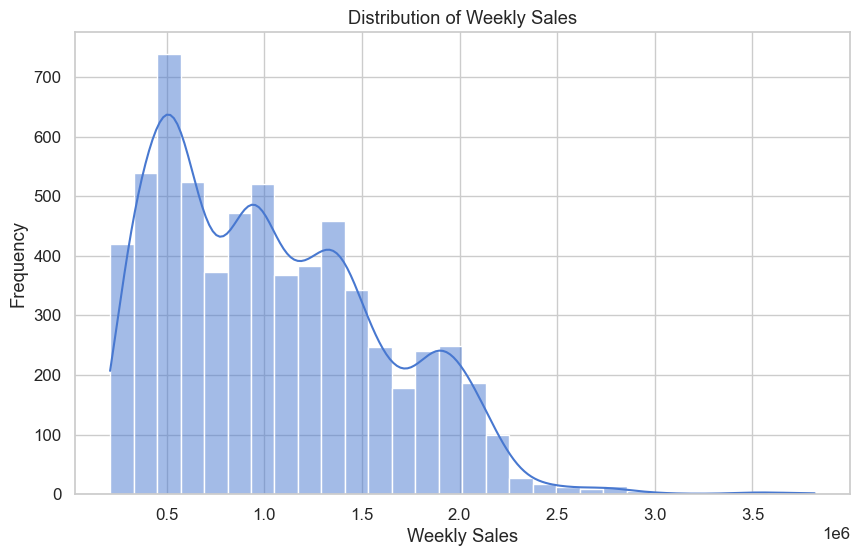

In [28]:
   plt.figure(figsize=(10,6))
   sns.histplot(df['Weekly_Sales'], bins=30, kde=True)
   plt.title('Distribution of Weekly Sales')
   plt.xlabel('Weekly Sales')
   plt.ylabel('Frequency')
   plt.show()

## Exploratory Data Analysis
#### Univariate Analysis
    a. Numerical Columns

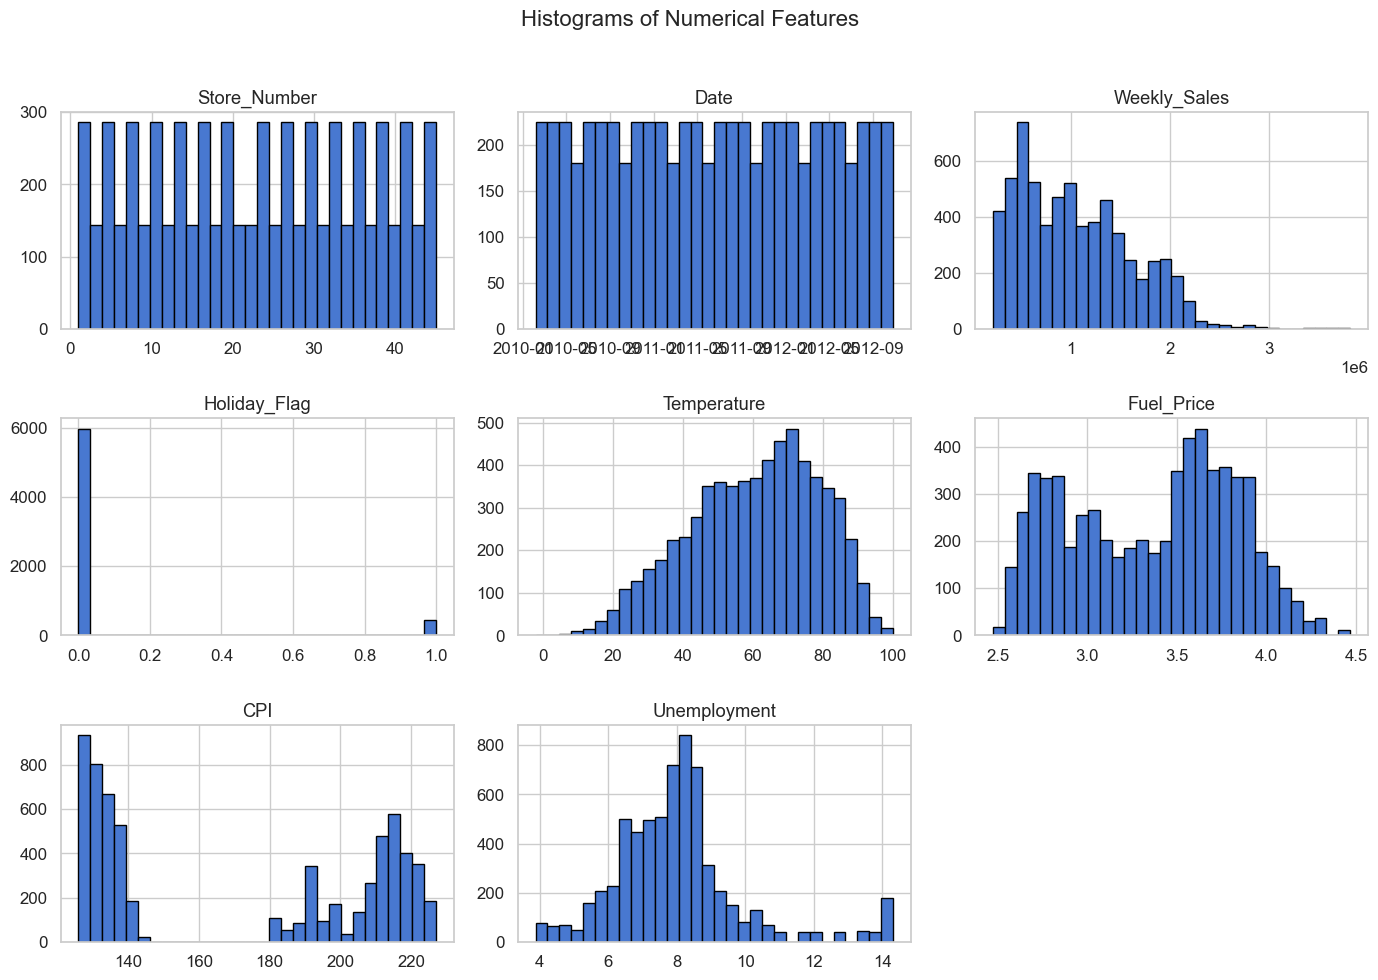

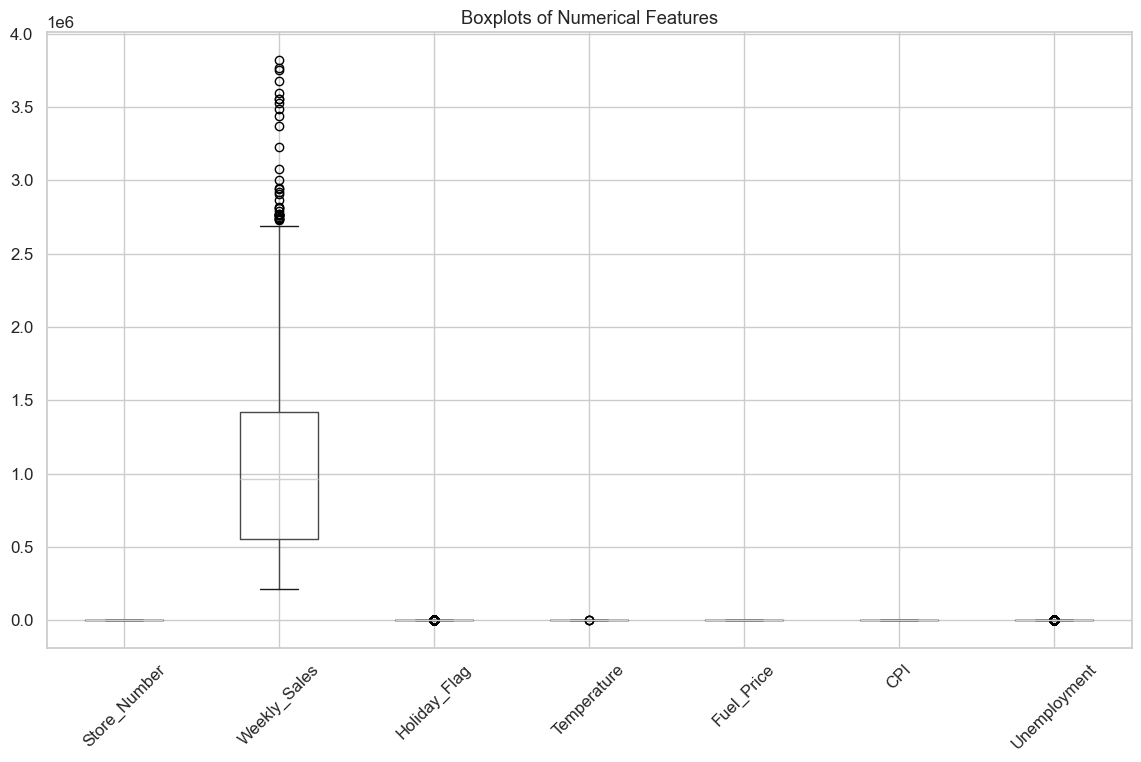

In [29]:
# Summary statistics for numerical columns
# display(df.describe())

# Histograms for all numerical columns
df.hist(figsize=(14, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Boxplots for all numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(14, 8))
df[num_cols].boxplot()
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

    b. Categorical Columns

In [ ]:
# Value counts for categorical columns
print("Holiday_Flag value counts:")
print(df['Holiday_Flag'].value_counts())

# Bar plot for Holiday_Flag
sns.countplot(x='Holiday_Flag', data=df)
plt.title('Holiday Flag Distribution')
plt.show()